In [1]:
import sys
import os

# Add repo root to Python path (one level up from examples/)
sys.path.append(os.path.abspath(".."))  

from src.parsing import *
from CRN_Simulation.CRN import CRN

import numpy as np
import random

In [2]:
# Potentially make something that would generate all the complexes and such.
# Could generalize more.

# Define species names
species_names = ["X", "Y", "Z"]

# Define complexes (example: bi-molecular)
complexes = np.array([
    [0, 1, 0, 0, 2, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 2, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 2, 0, 1, 1]
])


# Create Reactant, Product, Stochiometric Matrix, Define Compatible Reactions and Everything Needed for CRN
reactant_matrix, product_matrix, stoichiometric_matrix, reaction_names, parameter_names, compatible_reactions = generate_reactions(complexes, species_names)

# Plot some output to the screen
print(f"Total reactions generated: {len(reaction_names)}")
max_show = 3
print("Some Reaction Names:", reaction_names[:max_show])

print("Some Non-Unique Stoichiometric Changes")
count_shown = 0
for deltaX, rxn_indices in compatible_reactions.items():
    if len(rxn_indices) > 1:
        deltaX_clean = tuple(int(x) for x in deltaX)
        # Grab all reaction names
        rxn_names = [reaction_names[i] for i in rxn_indices]
        print(f"ΔX = {deltaX_clean} → indices: {rxn_indices}, reactions: {rxn_names}")
        count_shown += 1
        if count_shown >= max_show:
            break

Total reactions generated: 90
Some Reaction Names: ['Empty_to_X:', 'Empty_to_Y:', 'Empty_to_Z:']
Some Non-Unique Stoichiometric Changes
ΔX = (1, 0, 0) → indices: [0, 12, 24, 34], reactions: ['Empty_to_X:', 'X_to_2X:', 'Y_to_X+Y:', 'Z_to_X+Z:']
ΔX = (0, 1, 0) → indices: [1, 15, 22, 35], reactions: ['Empty_to_Y:', 'X_to_X+Y:', 'Y_to_2Y:', 'Z_to_Y+Z:']
ΔX = (0, 0, 1) → indices: [2, 16, 26, 32], reactions: ['Empty_to_Z:', 'X_to_X+Z:', 'Y_to_Y+Z:', 'Z_to_2Z:']


In [3]:
# Number of reactions to sample
N = 3
alpha, beta = 2.6, 0.4

(CRN_stoichiometric_matrix, CRN_reaction_names, CRN_parameter_names,
 CRN_propensities, parameter_values, sampled_indices) = sample_reactions(
    reactant_matrix, product_matrix, stoichiometric_matrix,
    reaction_names, parameter_names,
    species_names=species_names,
    N=N, alpha=alpha, beta=beta, seed=42
)

print("Sampled reactions:")
for name, param in zip(CRN_reaction_names, CRN_parameter_names):
    print(f"{param}: {name}")


rn = CRN(species_names=species_names,
         stoichiometric_matrix=CRN_stoichiometric_matrix,
         parameters_names=CRN_parameter_names,
         reaction_names=CRN_reaction_names,
         propensities=CRN_propensities)

print("CRN object created.")
print("Parameter values:", parameter_values)

Sampled reactions:
k81: Y+Z_to_Empty:
k14: X_to_2Z:
k3: Empty_to_2X:
CRN object created.
Parameter values: {'k81': 1.2398995208507477, 'k14': 0.8259243249147579, 'k3': 0.7728393055851849}


Initial state: {'X': np.int64(7), 'Y': np.int64(4), 'Z': np.int64(8)}
Trajectory saved to ../data/example3_trajectory.json


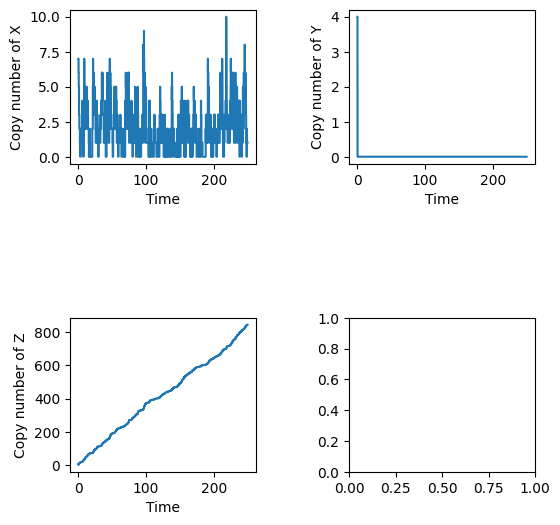

In [12]:
data_dir = "../data"  # relative to examples/ folder
os.makedirs(data_dir, exist_ok=True)

# Generate trajectory
time_list, state_list = generate_single_trajectory(
    rn,
    parameter_values,
    species_names,
    finalTime=250,   # adjust as needed
    minVal=1,
    maxVal=10,
    seed=42          # for reproducibility
)

# Save trajectory to JSON
trajectory_file = os.path.join(data_dir, "example3_trajectory.json")
save_trajectory(time_list, state_list, filename=trajectory_file)

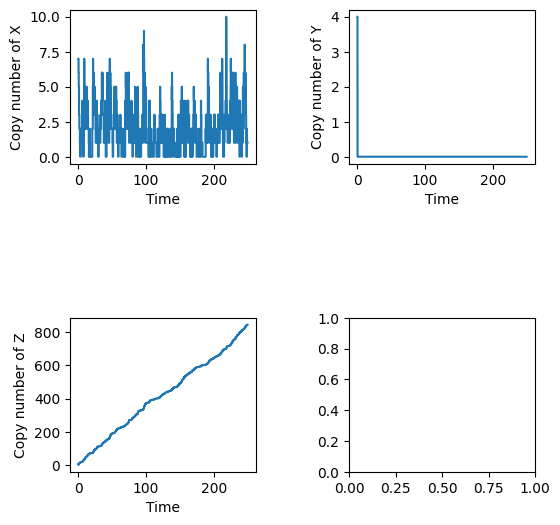

In [13]:
trajectory_file_new = "../data/example3_trajectory.json"
time_list_new, state_list_new = load_trajectory(trajectory_file_new)
rn.plot_trajectories(time_list, state_list)

In [14]:
# Parse trajectories for CRN1
print("Parsing Trajectory 1")
unique_changes, unique_states, jump_counts, waiting_times, propensities = parse_trajectories(
    state_list,
    time_list,
    reactant_matrix,
    compatible_reactions,
    verbose=True
)
print("---------")

# Parse trajectories for CRN1
print("Parsing Trajectory 2")
unique_changes, unique_states_new, jump_counts_new, waiting_times_new, propensities_new = parse_trajectories(
    state_list_new,
    time_list_new,
    reactant_matrix,
    compatible_reactions,
    verbose=True
)
print("---------")
# Print basic summary
print("Finished parsing trajectories. Summary:")
print(f"Trajectory 1: {len(unique_states)} unique states observed")
print(f"Trajectory 2: {len(unique_states_new)} unique states observed")

Parsing Trajectory 1
Wrapped single trajectory into list of trajectories.
Tracking 54 unique stoichiometric changes across all trajectories.
Processing trajectory 1 of 1
Finished parsing trajectories.
---------
Parsing Trajectory 2
Wrapped single trajectory into list of trajectories.
Tracking 54 unique stoichiometric changes across all trajectories.
Processing trajectory 1 of 1
Finished parsing trajectories.
---------
Finished parsing trajectories. Summary:
Trajectory 1: 631 unique states observed
Trajectory 2: 631 unique states observed


In [15]:
time_list[0:10]

[0,
 np.float64(0.011097811874413189),
 np.float64(0.06810330478021509),
 np.float64(0.07480634651665741),
 np.float64(0.10187345475689061),
 np.float64(0.106534837828003),
 np.float64(0.3770422556434983),
 np.float64(0.7230034276682743),
 np.float64(0.8811820793606082),
 np.float64(1.2606936273142046)]

In [16]:
state_list[0:10]

[array([7., 4., 8.]),
 array([7., 3., 7.]),
 array([7., 2., 6.]),
 array([7., 1., 5.]),
 array([7., 0., 4.]),
 array([6., 0., 6.]),
 array([5., 0., 8.]),
 array([ 4.,  0., 10.]),
 array([ 3.,  0., 12.]),
 array([ 2.,  0., 14.])]